# Problem Statement
Predict whether a borrower will fail to fully repay a loan (not_fully_paid = 1) based on their financial history and credit-related factors. This will help lenders assess loan default risk and make better lending decisions.

✅ Target (y): not_fully_paid (1 = Loan not fully paid, 0 = Loan fully paid)

# Dataset Description

This dataset contains loan data from LendingClub.com, a platform connecting borrowers with investors, spanning the years 2007 to 2010. It includes information on over 9,500 loans, detailing loan structure, borrower characteristics, and loan repayment status. The data is derived from publicly available information on LendingClub.com.
**Source:** [Kaggle - Loan Data](https://www.kaggle.com/itssuru/loan-data)

## Data Dictionary

| Variable           | Explanation                                                                                                                                                                                                    |
|--------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| credit_policy      | 1 if the customer meets the credit underwriting criteria; 0 otherwise.                                                                                                                                       |
| purpose            | The purpose of the loan.                                                                                                                                                                                      |
| int_rate           | The interest rate of the loan (higher rates indicate higher risk).                                                                                                                                            |
| installment        | The monthly installments owed by the borrower if the loan is funded.                                                                                                                                         |
| log_annual_inc     | The natural logarithm of the borrower's self-reported annual income.                                                                                                                                          |
| dti                | The borrower's debt-to-income ratio (debt divided by annual income).                                                                                                                                         |
| fico               | The borrower's FICO credit score.                                                                                                                                                                            |
| days_with_cr_line  | The number of days the borrower has had a credit line.                                                                                                                                                        |
| revol_bal          | The borrower's revolving balance (unpaid amount at the end of the credit card billing cycle).                                                                                                                |
| revol_util         | The borrower's revolving line utilization rate (credit line used relative to total available credit).                                                                                                       |
| inq_last_6mths     | The borrower's number of credit inquiries in the last 6 months.                                                                                                                                              |
| delinq_2yrs        | The number of times the borrower was 30+ days past due on a payment in the past 2 years.                                                                                                                       |
| pub_rec            | The borrower's number of derogatory public records.                                                                                                                                                         |
| not_fully_paid     | 1 if the loan was not fully paid; 0 otherwise.                                                                                                                                                              |


### 1. Data Loading

In [3]:
# Imports
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)


In [4]:
# Load a DataFrame with a specific version of a CSV
df = kagglehub.dataset_load(
    kagglehub.KaggleDatasetAdapter.PANDAS,
    "itssuru/loan-data/versions/1",
    "loan_data.csv",
)

df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### 2.Data Exploration

In [5]:
# Display basic info
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<ipython-input-6-f2946d8162bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="not.fully.paid", data=df, palette="coolwarm")


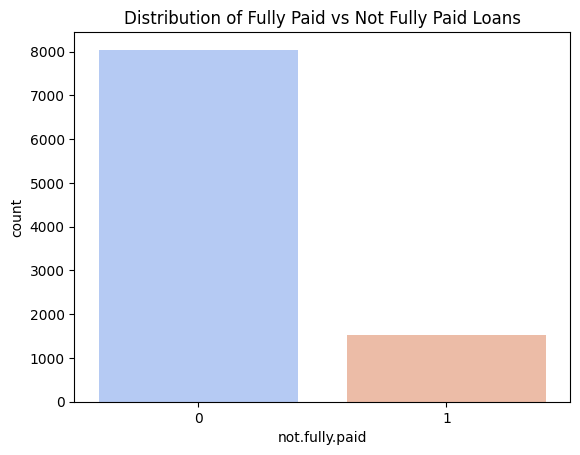

In [6]:
# Visualizing the target variable
sns.countplot(x="not.fully.paid", data=df, palette="coolwarm")
plt.title("Distribution of Fully Paid vs Not Fully Paid Loans")
plt.show()

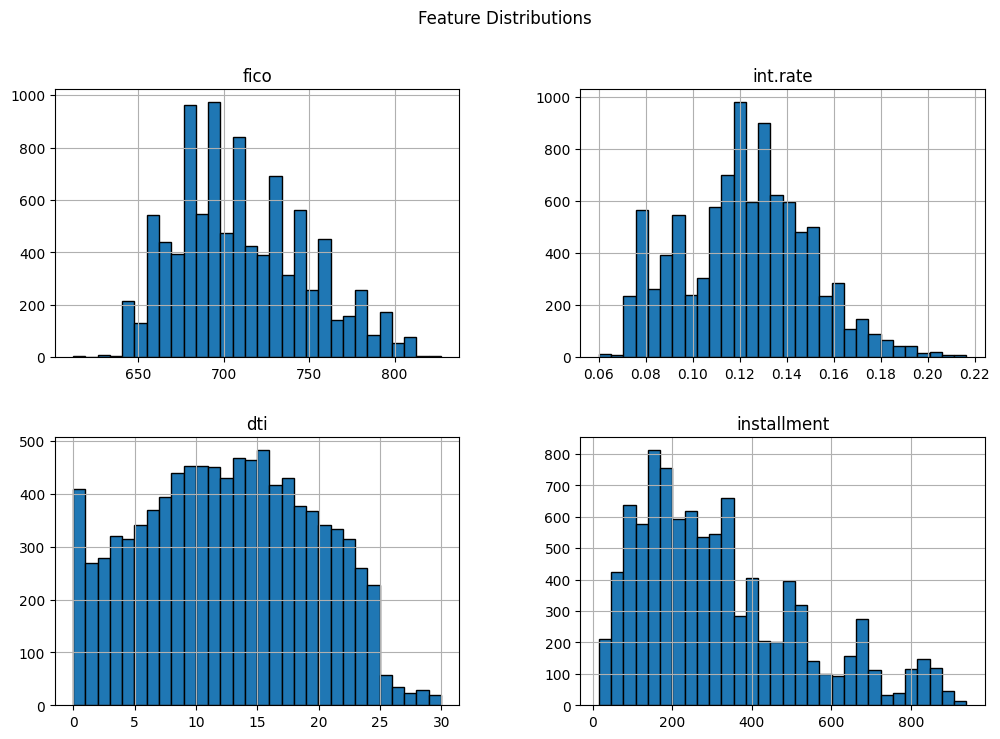

In [7]:
# Feature Distribution Analysis
# Histogram for key numerical features
num_features = ["fico", "int.rate", "dti", "installment"]
df[num_features].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()

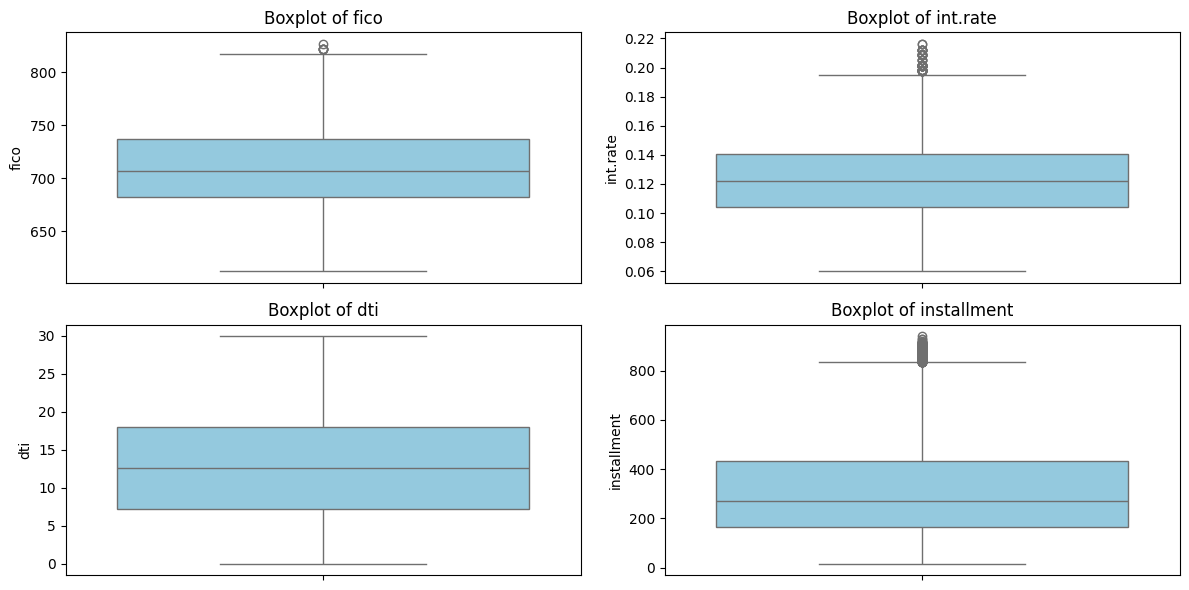

In [8]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, feature in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[feature], color="skyblue")
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [9]:
# Encode categorical column 'purpose' using Label Encoding
le = LabelEncoder()
df["purpose"] = le.fit_transform(df["purpose"])

<Axes: xlabel='purpose', ylabel='count'>

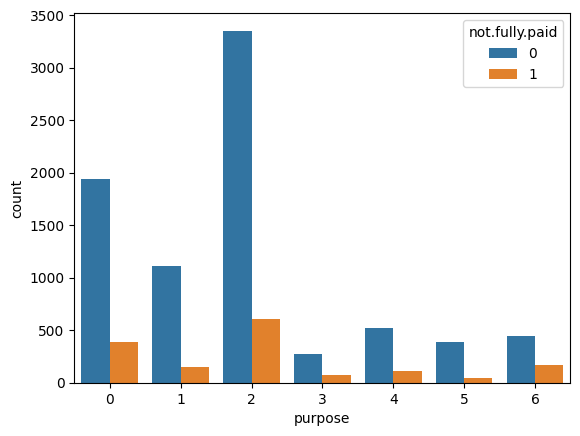

In [18]:
# Class distribution (not_fully_paid counts)
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

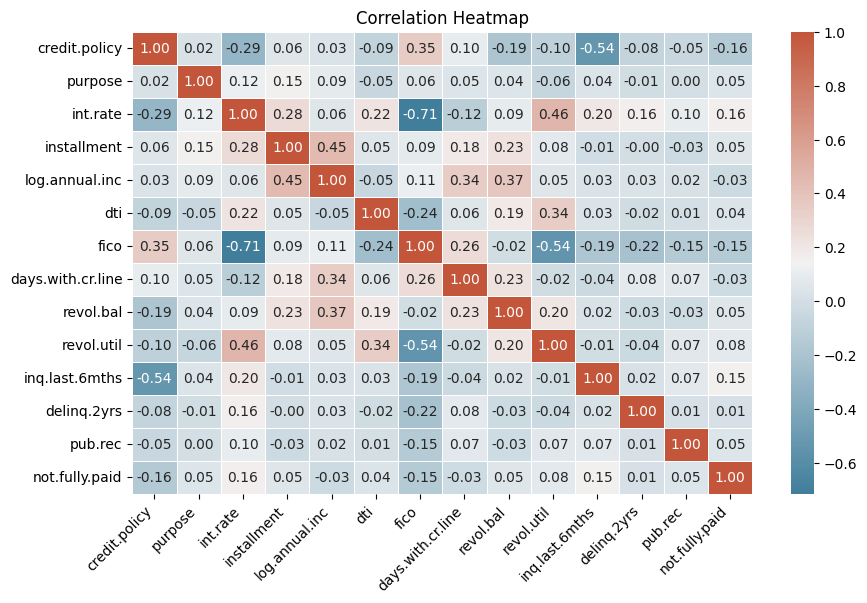

In [17]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right');
plt.show()

In [12]:
# Define features (X) and target (y)
X = df.drop(columns=["not.fully.paid"])
# X = df.drop(columns=["fico", "credit.policy","not.fully.paid", "log.annual.inc", "days.with.cr.line"]) # when we drop this coluns that have very low correlation with target the increase in accuracy is insignificant while also negatively affecting f1-score
y = df["not.fully.paid"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 3. Model Building and Training

In [13]:
model = GaussianNB()
model.fit(X_train, y_train);

### 4. Model Evaluation

In [14]:
y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.831419624217119
F1 Score: 0.8753070561525905


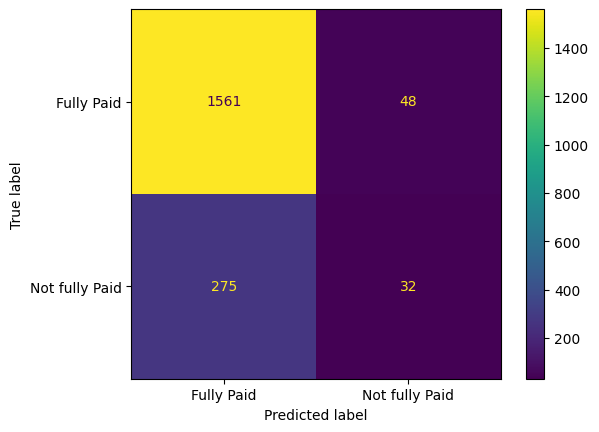

In [15]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

### **Conclusion**  

In this project, we implemented two classification models—**Naïve Bayes** and **Logistic Regression**—to predict whether a loan will be fully paid or not.  

**Key Insights:**  
✅ **Naïve Bayes** is a simple, fast, and computationally efficient classifier, especially effective for text-based problems. However, its **independence assumption** may not always hold in real-world data, which can impact accuracy.  
✅ **Logistic Regression** provides **probabilistic predictions** and performs well when features are correlated.

Despite Naïve Bayes' limitations, its **mathematical simplicity** and **interpretability** make it a strong choice in many applications, including **spam detection** and **text classification**. However, when relationships between features exist, **Logistic Regression often performs better**, making it a preferred choice for structured numerical datasets like loan approvals.